In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from fastai.vision import *
from fastai.metrics import accuracy
from fastai.basic_data import *
from skimage.util import montage
import pandas as pd
from torch import optim
import re
import json
import cv2
# import albumentations
from fastai.callbacks.hooks import num_features_model
from torch.nn import L1Loss

In [2]:
import numpy as np
import torch
import pandas as pd
import random
import string

In [3]:
model_name = 'efficientnet-b0'

In [4]:
from efficientnet_pytorch import EfficientNet
model = EfficientNet.from_pretrained(model_name) 

Loaded pretrained weights for efficientnet-b0


In [5]:
np.random.seed(42)

In [6]:
image_size = EfficientNet.get_image_size(model_name)

In [7]:
src = (ImageList.from_folder(path='../../data/train/').split_by_rand_pct(0.2).label_from_folder())

In [8]:
res = []
res.append(rotate(degrees=(-90,90), p=1))

In [9]:
tfms=(res,[])

In [10]:
data = (src.transform(tfms, size=image_size, resize_method=ResizeMethod.SQUISH).databunch(bs=32).normalize(imagenet_stats))

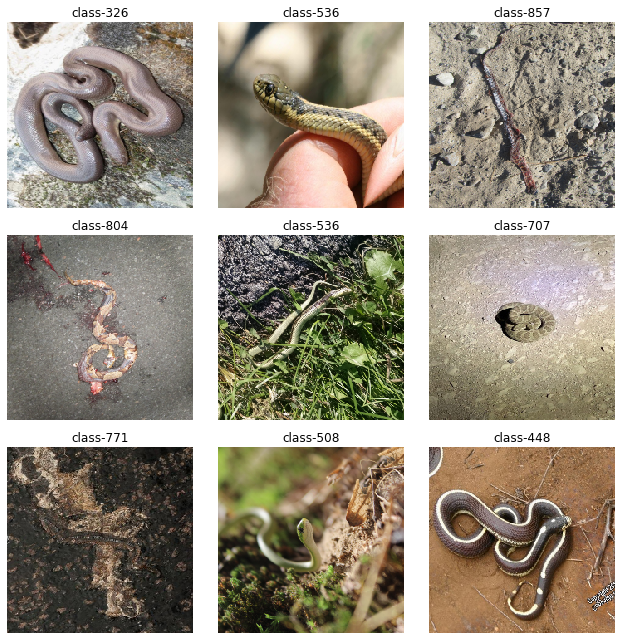

In [11]:
data.show_batch(3,figsize=(9,9))

In [12]:

list(children(model))[-2:]

[Linear(in_features=1280, out_features=1000, bias=True),
 MemoryEfficientSwish()]

In [13]:
model.add_module('_fc',nn.Linear(1280, data.c))

In [14]:
loss_func = LabelSmoothingCrossEntropy()

In [15]:
RMSprop = partial(torch.optim.RMSprop)

In [16]:
from torch.optim import Optimizer

In [17]:
learn = Learner(data, model, loss_func=loss_func, opt_func=RMSprop, metrics=[accuracy,FBeta(beta=1,average='macro')])

In [18]:
learn.split([[learn.model._conv_stem, learn.model._bn0, learn.model._blocks[:8]],
             [learn.model._blocks[8:],learn.model._conv_head], 
             [learn.model._bn1,learn.model._fc]])
print("pls")

pls


In [19]:
lr=1e-3

In [20]:
learn.fit_one_cycle(40,max_lr=slice(lr/100,lr))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,2.146462,1.983170,0.556937,0.469421,10:40
1,2.004675,1.878394,0.595098,0.523838,10:57
2,1.959044,1.902287,0.601044,0.531659,11:50
3,1.918576,1.858631,0.614209,0.549128,10:49
4,1.887640,1.827201,0.627010,0.564727,10:57
5,1.814720,1.807642,0.621913,0.559384,11:08
6,1.825783,1.838943,0.627192,0.561605,10:53
7,1.770134,1.786110,0.638597,0.571191,11:10
8,1.706837,1.782812,0.641024,0.580558,11:05
9,1.657147,1.758461,0.648365,0.583819,10:55


In [23]:
learn.save('b0-trained-for-40', return_path=True)

PosixPath('../../data/train/models/b0-trained-for-40.pth')

In [ ]:
learn = learn.load('b0-trained-for-40')